# AI-Based Student Performance Prediction System



## 1. Import Libraries


In [3]:
import pandas as pd
import numpy as np

print("Libraries imported successfully")


Libraries imported successfully


## 2. Dataset Creation


In [4]:
import pandas as pd
import random

data = []

for i in range(150):
    study_hours = random.randint(1, 10)
    attendance = random.randint(50, 100)
    previous_score = random.randint(30, 90)
    assignment_marks = random.randint(30, 90)
    
    if previous_score > 50 and attendance > 60:
        result = "Pass"
    else:
        result = "Fail"
        
    data.append([study_hours, attendance, previous_score, assignment_marks, result])

df = pd.DataFrame(data, columns=["study_hours", "attendance", "previous_score", "assignment_marks", "result"])

df.head()


,study_hours,attendance,previous_score,assignment_marks,result
0,4,63,55,87,Pass
1,10,70,64,74,Pass
2,9,50,64,72,Fail
3,10,54,68,37,Fail
4,10,99,88,74,Pass


## 3. Data Preprocessing


In [5]:
df.to_csv("student_data.csv", index=False)


In [6]:
df['result'] = df['result'].map({'Pass': 1, 'Fail': 0})
df.head()


,study_hours,attendance,previous_score,assignment_marks,result
0,4,63,55,87,1
1,10,70,64,74,1
2,9,50,64,72,0
3,10,54,68,37,0
4,10,99,88,74,1


In [7]:
X = df[['study_hours', 'attendance', 'previous_score', 'assignment_marks']]
y = df['result']


## 4. Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Model Training

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 6. Model Accuracy 


In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.8


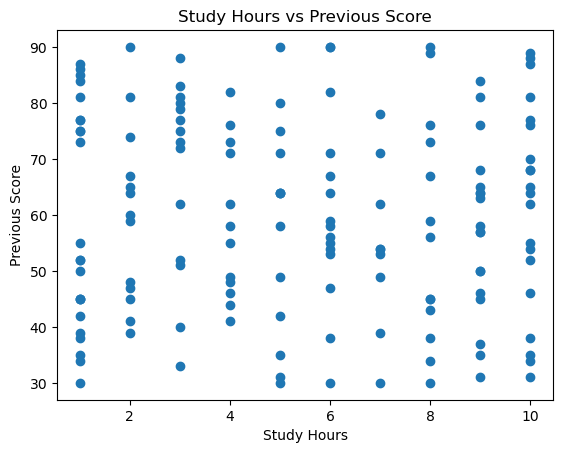

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['study_hours'], df['previous_score'])
plt.xlabel("Study Hours")
plt.ylabel("Previous Score")
plt.title("Study Hours vs Previous Score")
plt.show()


## 7. Confusion Matrix

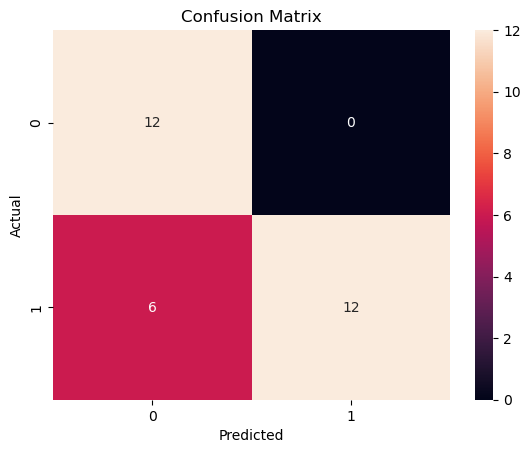

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       1.00      0.67      0.80        18

    accuracy                           0.80        30
   macro avg       0.83      0.83      0.80        30
weighted avg       0.87      0.80      0.80        30



## 8. Data Visualization

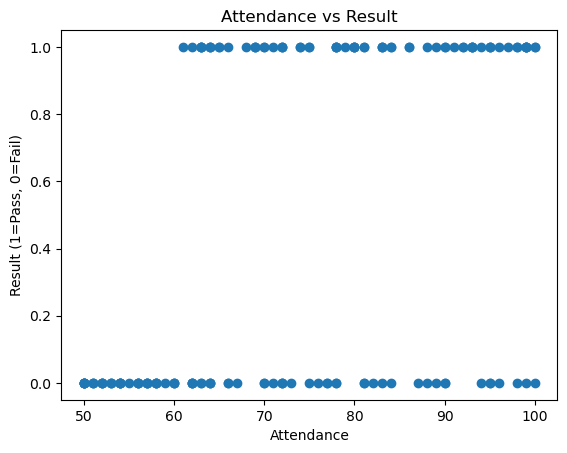

In [14]:
plt.figure()
plt.scatter(df['attendance'], df['result'])
plt.xlabel("Attendance")
plt.ylabel("Result (1=Pass, 0=Fail)")
plt.title("Attendance vs Result")
plt.show()


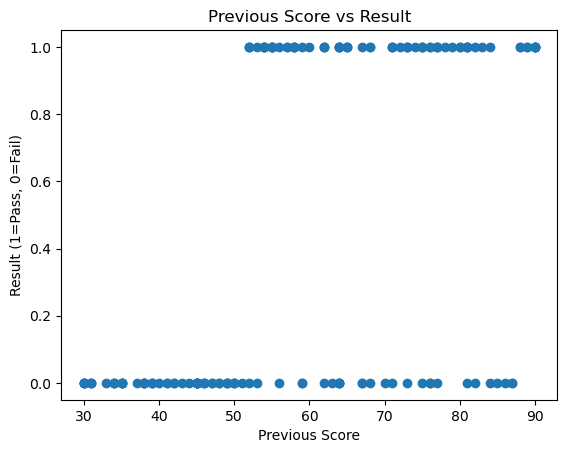

In [15]:
plt.figure()
plt.scatter(df['previous_score'], df['result'])
plt.xlabel("Previous Score")
plt.ylabel("Result (1=Pass, 0=Fail)")
plt.title("Previous Score vs Result")
plt.show()


## 9. Manual Prediction

In [17]:
study_hours = float(input("Enter Study Hours: "))
attendance = float(input("Enter Attendance: "))
previous_score = float(input("Enter Previous Score: "))
assignment_marks = float(input("Enter Assignment Marks: "))

new_data = [[study_hours, attendance, previous_score, assignment_marks]]

prediction = model.predict(new_data)

if prediction[0] == 1:
    print("Prediction: PASS")
else:
    print("Prediction: FAIL")


Enter Study Hours:  8
Enter Attendance:  54
Enter Previous Score:  89
Enter Assignment Marks:  75


Prediction: PASS


D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
